<a href="https://colab.research.google.com/github/mgoetze06/fotobooth/blob/main/fotobox-cvml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
#from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#convert to script:
#jupyter nbconvert --to script *.ipynb

# Face Frontal Classifier

In [2]:
#face_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_frontalface_alt2.xml')
face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


(697, 1000, 3)
(697, 1000, 3)


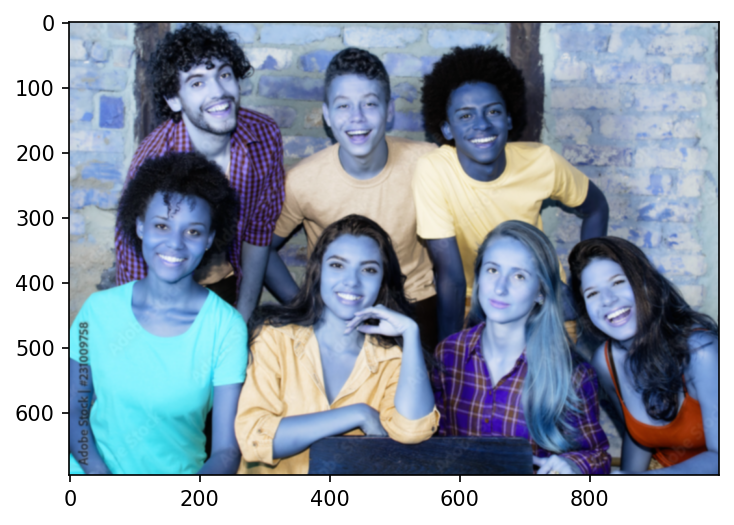

In [3]:
#cap = cv2.VideoCapture(0)
#img = cv2.imread('/content/drive/MyDrive/test.JPG', cv2.IMREAD_GRAYSCALE)
#org_img = cv2.imread('/content/drive/MyDrive/test.JPG')
#org_img = cv2.imread('/content/drive/MyDrive/cvml-emb/test_gruppe.jpg')
org_img = cv2.imread('test_gruppe.jpg')
h_org,w_org,temp = org_img.shape
print(org_img.shape)
reduce_factor = 1
img = cv2.resize(org_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
img = cv2.GaussianBlur(img, (5,5), 0)
#img = cv2.imread('/path_to_image/opencv-logo.png', 0) 
#cv2.imshow('image',img) not available in jupyter
#plt.imshow(img, cmap='gray')
plt.figure(figsize=(6, 4), dpi=150)
plt.imshow(img)
print(img.shape)

In [4]:
#success, img = cap.read()
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#face_boxes = face_cas.detectMultiScale(im_gray, scaleFactor=1.05, minNeighbors=9)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=9, outputRejectLevels=True)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.2, minNeighbors=9, outputRejectLevels=True)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.15, minNeighbors=20, outputRejectLevels=True)
face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.01, minNeighbors=15, outputRejectLevels=True)
print(face_boxes)
print(rejectLevels)
print(levelWeights)

[[ 12 620  27  27]
 [  5 556  37  37]
 [543 517  62  62]
 [246 566  91  91]
 [774 370 105 105]
 [616 343 114 114]
 [375 332 120 120]
 [162  43 121 121]
 [389  87 107 107]
 [103 272 124 124]
 [580  98 106 106]
 [844 136 139 139]
 [487  97  59  59]]
[25 25 25 25 25 25 25 25 25 25 25 25 25]
[4.33871915 4.59980297 1.53554806 4.95462798 6.37955705 9.26461296
 9.12015809 6.40328916 9.97627006 8.77658913 9.22804703 2.23018699
 4.602551  ]


True

<Figure size 432x288 with 0 Axes>

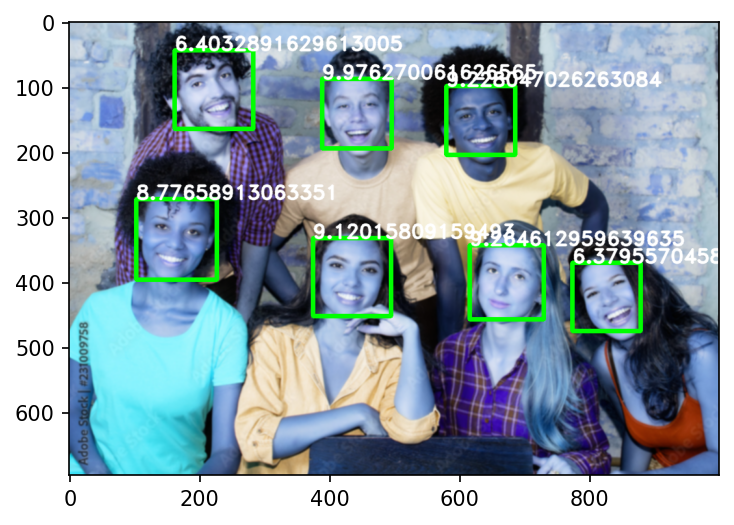

In [6]:
score_val = 5
i = 0
plt.clf()
faces = 0
for (x, y, w, h) in face_boxes:
  if (levelWeights[i]>score_val):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
    #cv2.rectangle(org_img,(int(x*reduce_factor), int(y*reduce_factor)),(int(x*reduce_factor + w*reduce_factor), int(y*reduce_factor + h*reduce_factor)), (0, 255, 0), 5)
    #cv2.putText(img,str(levelWeights[i][0]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(img,str(levelWeights[i]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    faces = faces + 1
  i = i + 1
plt.figure(figsize=(6, 4), dpi=150)
plt.imshow(img, cmap='gray')
cv2.imwrite("face_detected.jpg", img)


#plt.savefig('test_detected.jpg')
#cv2.imshow('Output', img)
#cap.release()
#cv2.destroyAllWindows()

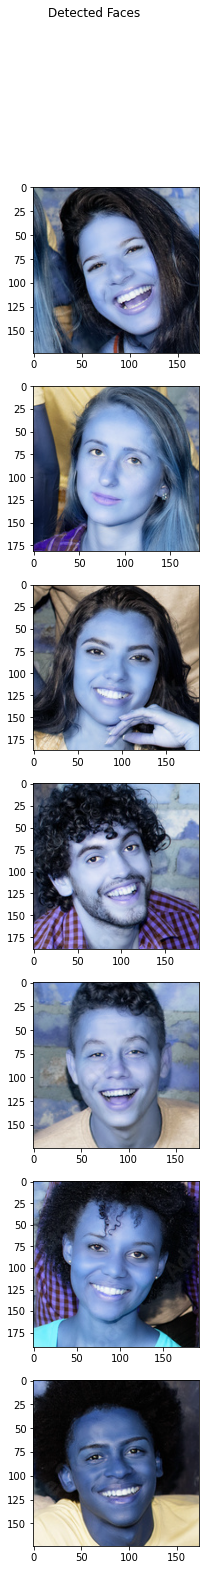

In [7]:
i = 0
#plt.figure(figsize=(4, 8), dpi=150)
fig,axs = plt.subplots(faces,figsize=(25,25))
axs_index = 0
fig.suptitle('Detected Faces')
for face_box in face_boxes:
  if (levelWeights[i]>score_val):
    x, y, w_box, h_box = face_box*reduce_factor
    #h_org of original image
    #w_org of original image
    #print(x, y, w_box, h_box)
    crop_padding = int(h_org/20) #crop border is 1/15 of the orig. image height
    x = x - crop_padding
    y = y - crop_padding
    if x <= 0:
      x = 0
    if y <= 0:
      y = 0

    #create size of face box with padding
    w_box = w_box + 2*crop_padding
    h_box = h_box + 2*crop_padding

    #if face is near edge --> cropped image is moved from edge away
    if (x + w_box) >= w_org:
      x = w_org - w_box
    if (y + h_box) >= h_org:
      y = h_org - h_box

    #print(x, y, w_box, h_box)
    cropped_img = org_img[y:y+h_box, x:x+w_box]

    #plt.imshow(cropped_img)
    axs[axs_index].imshow(cropped_img)
    filename = "face%s.jpg"%axs_index
    cv2.imwrite(filename, cropped_img)
    axs_index = axs_index+1
  i = i+1


**Smile Classifier**

In [8]:
#smile_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_smile.xml')
smile_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

In [9]:
img = cv2.imread('face0.jpg')

In [10]:
#success, img = cap.read()
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
smile_boxes,rejectLevels, levelWeights = smile_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=40, outputRejectLevels=True)
if (len(smile_boxes)<1):
  print("why no smile?")
else:
  print(smile_boxes)
  print(rejectLevels)
  print(levelWeights)


[[ 76 109  57  28]]
[20]
[2.60761974]


In [11]:
for (x, y, w, h) in smile_boxes:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)

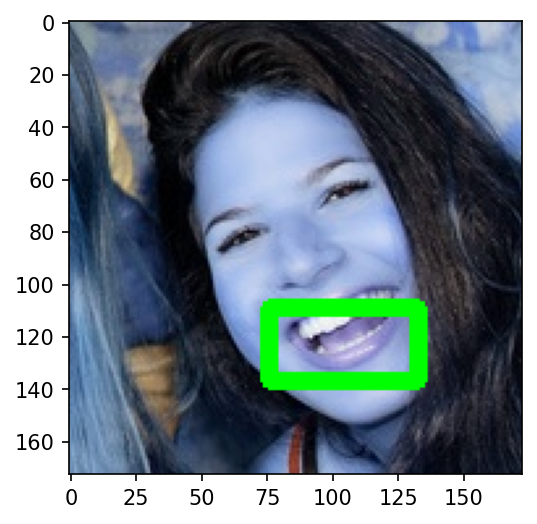

In [12]:
plt.figure(figsize=(6, 4), dpi=150)
plt.imshow(img, cmap='gray')

# Gesture Detection

In [2]:
#code from: https://techvidvan.com/tutorials/hand-gesture-recognition-tensorflow-opencv/

# import necessary packages for hand gesture recognition project using Python OpenCV
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

In [91]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [92]:
# Load the gesture recognizer model

model = load_model('hand-gesture-recognition-code\mp_hand_gesture')
#model = load_model('mp_hand_gesture')
# Load class name
f = open('hand-gesture-recognition-code\gesture.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

['okay', 'peace', 'thumbs up', 'thumbs down', 'call me', 'stop', 'rock', 'live long', 'fist', 'smile']


(4533, 6433, 3)
(1133, 1608, 3)


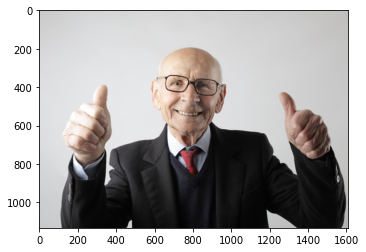

In [93]:
thumbs_img = cv2.imread('thumbsup2.jpg')
h_org,w_org,temp = thumbs_img.shape
print(thumbs_img.shape)
reduce_factor = 4
thumbs_img = cv2.resize(thumbs_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
#thumbs_img = cv2.GaussianBlur(thumbs_img, (5,5), 0)
framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
plt.clf()
plt.imshow(framergb)
x , y, c = framergb.shape
print(framergb.shape)

In [94]:
# Get hand landmark prediction
w = int(y/12)
h = int(y/12)
result = hands.process(framergb)
className = ''
# post process the result
print(result)
if result.multi_hand_landmarks:
    #print(result.multi_hand_landmarks)
    #for hand in result.multi_hand_landmarks:
    print(hand)
    landmarks = []
    for handslms in result.multi_hand_landmarks:
        #print(handslms)
        for lm in handslms.landmark:
            #print(id, lm)
            lmx = int(lm.x * x)
            lmy = int(lm.y * y)
            landmarks.append([lmx, lmy])
            #print(lmx, lmy)
        cv2.rectangle(thumbs_img, (lmx, lmy), (lmx + w, lmy + h), (0, 255, 0), 5)
          # Drawing landmarks on frames
        mpDraw.draw_landmarks(thumbs_img, handslms, mpHands.HAND_CONNECTIONS)

<class 'mediapipe.python.solution_base.SolutionOutputs'>
landmark {
  x: 0.8543809056282043
  y: 0.6210899353027344
  z: -5.362931574381946e-07
}
landmark {
  x: 0.8154732584953308
  y: 0.5711236000061035
  z: -0.03507879376411438
}
landmark {
  x: 0.8079865574836731
  y: 0.49084728956222534
  z: -0.0465334989130497
}
landmark {
  x: 0.8064893484115601
  y: 0.4355936050415039
  z: -0.05127797648310661
}
landmark {
  x: 0.7928524017333984
  y: 0.39125844836235046
  z: -0.0516882985830307
}
landmark {
  x: 0.872246265411377
  y: 0.46904507279396057
  z: -0.040893372148275375
}
landmark {
  x: 0.8377436995506287
  y: 0.5294926762580872
  z: -0.061294276267290115
}
landmark {
  x: 0.8257415294647217
  y: 0.5628097653388977
  z: -0.06939862668514252
}
landmark {
  x: 0.8330408334732056
  y: 0.5608865022659302
  z: -0.07501739263534546
}
landmark {
  x: 0.909076988697052
  y: 0.5092996954917908
  z: -0.03308723866939545
}
landmark {
  x: 0.8539798259735107
  y: 0.5827576518058777
  z: -0.050

1/1 [==============================] - 0s 78ms/step
[[1.7081103e-19 3.5999386e-34 9.8913866e-01 1.7429198e-30 1.7704801e-13
  0.0000000e+00 1.0798957e-27 0.0000000e+00 1.0861398e-02 3.5719046e-22]]
(1, 10)
(10,)
10
[1.7081103e-19 3.5999386e-34 9.8913866e-01 1.7429198e-30 1.7704801e-13
 0.0000000e+00 1.0798957e-27 0.0000000e+00 1.0861398e-02]
2


True

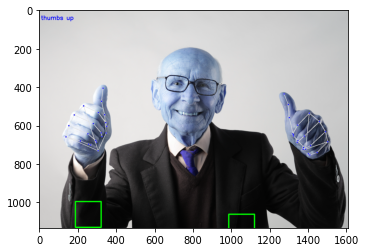

In [96]:
# Predict gesture in Hand Gesture Recognition project
prediction = model.predict([landmarks[0:21]]) #problem with predict if more than one hand is detected
#--> landmarks sind dann doppelt so lang wie sie für eine hand sein müssten

#landmarks vektor muss vorher geteilt werden auf die anzahl detecteter hände und dann erst prediction ausgeführt
print(prediction)
print(prediction.shape)
pred = prediction.flatten()
print(pred.shape)
print(len(pred))
print(pred[0:len(pred)-1])
classID = np.argmax(pred[0:len(pred)-1])
print(classID)
className = classNames[classID]
  # show the prediction on the frame
cv2.putText(thumbs_img, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX,
                 1, (0,0,255), 2, cv2.LINE_AA)
plt.imshow(thumbs_img)
cv2.imwrite("thumbs.jpg", thumbs_img)